In [ ]:
# ..... plot cell type numbers ..... #

In [15]:
library(dplyr)
library(ggplot2)
library(randomcoloR)

In [50]:
# get list of samples
stages = rep(c('stage23', 'stage28', 'stage32'), each = 3)
samples = c('sample3', 'sample4', 'sample10', 'sample5', 'sample10', 'sample11',
           'sample5', 'sample10', 'sample12')

ctypes2 = unique(df$predicted)
cols2 = distinctColorPalette(14)
cols2

[1] "#B4E74B" "#80E6DA" "#DD4EC5" "#D7E0D8" "#DE8CC8" "#D3E39E" "#D5B4C9"
 [8] "#8A82DF" "#9046DF" "#D3AC59" "#85B3DE" "#7CA48E" "#D4726F" "#6DE28B"

In [78]:
id = 9
ct_pred = read.delim(paste0(stages[id], '_', samples[id], '_mantri_celltypes.csv'), sep = ',')
ct_pred[1,]

group predicted    score    enrichment
stage32_sample12_AAACCCAAGATCGGTG-1 all   Erythrocytes 2.994641 2.629864

In [79]:
ct_pred$predicted <- as.factor(ct_pred$predicted)

df = ct_pred %>% group_by(predicted) %>% summarise(count = n())
df$col <- cols2[match(df$predicted, ctypes2)]
dim(df)
df[1,]

[1] 13  3

predicted        count col    
1 Cardiomyocytes-1 24    #B4E74B

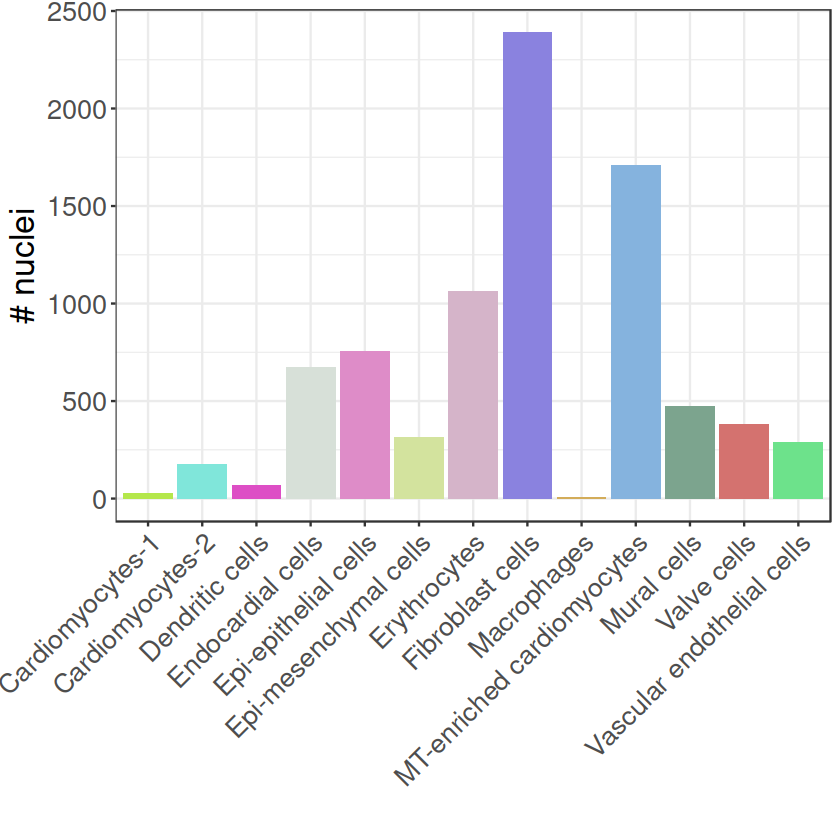

In [81]:
# png(paste0('aa-', stages[id], '_', samples[id], '-numnuc-barplot.png'), width = 9, height = 7, res = 300, units = 'in')
ggplot(df, aes(x = predicted, y = count, fill  = predicted)) +
geom_bar(stat = "identity", fill = df$col) + #scale_y_continuous(trans='log10') + 
theme_bw() + xlab('') + ylab('# nuclei') +
theme(text = element_text(size=20), axis.text.x = element_text(angle=45, hjust=1))
# dev.off()